In [1]:
import pandas as pd
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import openrouteservice as ors
import time
from collections import namedtuple
import numpy as np

In [2]:
load_dotenv()

True

In [3]:
directory = os.getcwd()
os.chdir(directory)

In [4]:
centroid_pairing_df = pd.read_csv(r"C:\Users\leoqi\Downloads\indiv_combined_centroid_data.csv")

In [6]:
centroid_pairing_df[centroid_pairing_df['cycle_route'].isna()]

,Latitude_x,Longitude_x,index_x,join_key,MRT.Name,Latitude_y,Longitude_y,index_y,euclidean_distance,coordinate_pair,cycle_route,bus_route,distance,cycle_duration,centroid_name,suitability,steepness
2,1.380869,103.748413,2,A,KEAT HONG LRT STATION,1.378603,103.749056,125,0.261871,"coordinate_pair(lat_x=1.380868921822081, lon_x...",NaN,NaN,NaN,NaN,205 CHOA CHU KANG CENTRAL,NaN,NaN
136,1.353336,103.961476,136,A,TAMPINES EAST MRT STATION,1.356191,103.954634,21,0.824152,"coordinate_pair(lat_x=1.3533363711406043, lon_...",NaN,NaN,NaN,NaN,EAST SPRING PRIMARY SCHOOL,NaN,NaN
137,1.355172,103.946187,137,A,TAMPINES EAST MRT STATION,1.356191,103.954634,21,0.945892,"coordinate_pair(lat_x=1.3551716913027807, lon_...",NaN,NaN,NaN,NaN,507 TAMPINES CENTRAL 1,NaN,NaN
138,1.428887,103.850365,138,A,YISHUN MRT STATION,1.429443,103.835005,78,1.708525,"coordinate_pair(lat_x=1.428886869803579, lon_x...",NaN,NaN,NaN,NaN,BLOSSOM SPRING @ YISHUN,NaN,NaN
184,1.357520,103.741479,184,A,BUKIT GOMBAK MRT STATION,1.358612,103.751791,45,1.152764,"coordinate_pair(lat_x=1.3575200241024, lon_x=1...",NaN,NaN,NaN,NaN,WEST PLAINS @ BUKIT BATOK,NaN,NaN
185,1.361995,103.750331,185,A,BUKIT GOMBAK MRT STATION,1.358612,103.751791,45,0.409739,"coordinate_pair(lat_x=1.3619950869649893, lon_...",NaN,NaN,NaN,NaN,348 BUKIT BATOK STREET 34,NaN,NaN
187,1.302801,103.908031,187,A,EUNOS MRT STATION,1.319784,103.903226,46,1.962444,"coordinate_pair(lat_x=1.3028012251995535, lon_...",NaN,NaN,NaN,NaN,MARINE PARADE PROMENADE,NaN,NaN
188,1.376442,103.765994,188,A,PETIR LRT STATION,1.377772,103.766646,123,0.164650,"coordinate_pair(lat_x=1.3764422356991495, lon_...",NaN,NaN,NaN,NaN,KOREAN CHURCH IN SINGAPORE,NaN,NaN
189,1.389415,103.908278,189,A,RUMBIA LRT STATION,1.391468,103.905974,122,0.343124,"coordinate_pair(lat_x=1.3894154808459367, lon_...",NaN,NaN,NaN,NaN,RIVERVALE DELTA,NaN,NaN
191,1.423224,103.845900,191,A,YISHUN MRT STATION,1.429443,103.835005,78,1.394614,"coordinate_pair(lat_x=1.4232239518697667, lon_...",NaN,NaN,NaN,NaN,FLORAL SPRING @ YISHUN,NaN,NaN


array([[<AxesSubplot:title={'center':'distance'}>,
        <AxesSubplot:title={'center':'cycle_duration'}>],
       [<AxesSubplot:title={'center':'suitability'}>,
        <AxesSubplot:title={'center':'steepness'}>]], dtype=object)

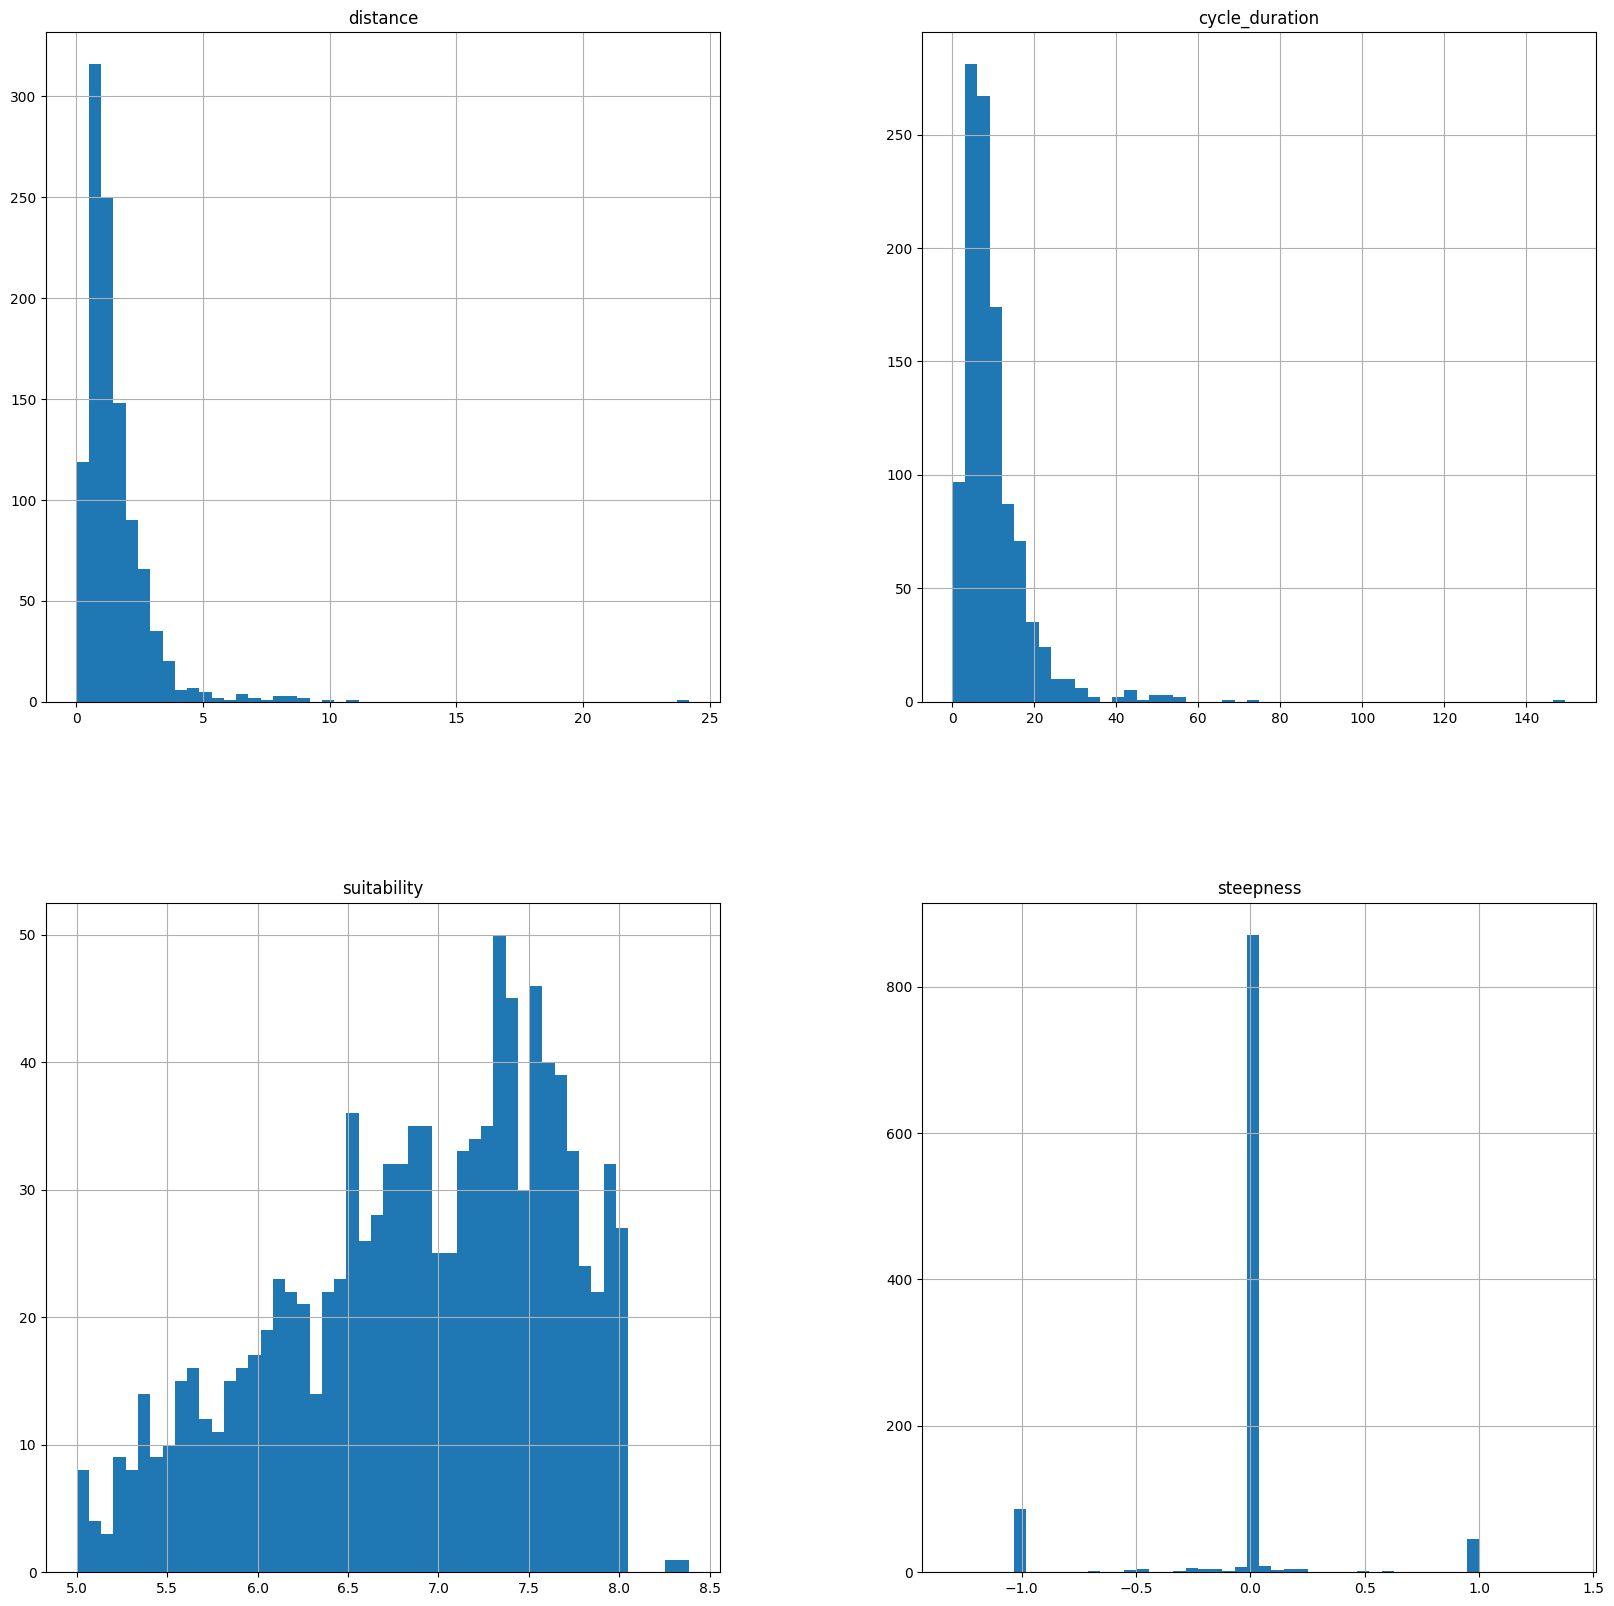

In [7]:
centroid_pairing_df.loc[:,"distance":].hist(bins=50, figsize=(20,20))

In [8]:
q1 = centroid_pairing_df['distance'].quantile(0.25)
q3 = centroid_pairing_df['distance'].quantile(0.75)
IQR = q3-q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

cond = (centroid_pairing_df['distance'] < lower_bound) | (centroid_pairing_df['distance'] > upper_bound)

outliers = centroid_pairing_df[cond]

In [9]:
outliers.shape

(52, 17)

In [10]:
outliers.index

Index([  11,   47,   84,   94,  145,  176,  179,  232,  269,  346,  362,  367,
        391,  398,  504,  520,  527,  544,  570,  577,  604,  607,  611,  615,
        625,  644,  663,  675,  677,  708,  721,  722,  731,  805,  809,  831,
        854,  857,  858,  862,  871,  890,  897,  912,  932,  969,  990,  998,
       1028, 1033, 1045, 1073],
      dtype='int64')

In [13]:
outliers.loc[84,:]

Latitude_x                                                        1.389
Longitude_x                                                   103.98795
index_x                                                              84
join_key                                                              A
MRT.Name                                     CHANGI AIRPORT MRT STATION
Latitude_y                                                     1.357479
Longitude_y                                                  103.987884
index_y                                                              38
euclidean_distance                                             3.504935
coordinate_pair       coordinate_pair(lat_x=1.3889995410271168, lon_...
cycle_route           {'status_message': 'Found route between points...
bus_route                                                           NaN
distance                                                         10.699
cycle_duration                                                66

In [14]:
input = pd.read_csv(r"C:\Users\leoqi\Downloads\indiv_combined_centroid_data_for_inputer.csv")

In [15]:
input[input.isna().any(axis = 1)].shape

(1100, 17)

In [17]:
from sklearn.impute import KNNImputer

In [18]:
imputer = KNNImputer(n_neighbors=2, weights="uniform", add_indicator= True)

In [20]:
X = input.loc[:,['distance','cycle_duration']]
X

,distance,cycle_duration
0,0.460,3.016667
1,2.648,16.500000
2,1.200,NaN
3,0.955,6.200000
4,0.537,3.633333
...,...,...
1095,0.911,5.766667
1096,0.839,6.066667
1097,2.114,13.533333
1098,1.060,6.900000


In [21]:
X_inputed = imputer.fit_transform(X)



In [23]:
df = pd.DataFrame(X_inputed, columns = ['distance','cycle_duration',"approximated?"])

In [24]:
centroid_pairing_df[['distance','cycle_duration']] = df[['distance','cycle_duration']]
centroid_pairing_df['approximated?'] = df['approximated?']

In [25]:
centroid_pairing_df

,Latitude_x,Longitude_x,index_x,join_key,MRT.Name,Latitude_y,Longitude_y,index_y,euclidean_distance,coordinate_pair,cycle_route,bus_route,distance,cycle_duration,centroid_name,suitability,steepness,approximated?
0,1.282627,103.826023,0,A,TIONG BAHRU MRT STATION,1.286103,103.827445,87,0.417554,"coordinate_pair(lat_x=1.28262693083003, lon_x=...",{'status_message': 'Found route between points...,NaN,0.460,3.016667,26 JALAN MEMBINA,7.033214,0.0,0.0
1,1.380156,103.879420,1,A,TONGKANG LRT STATION,1.389348,103.885844,84,1.246891,"coordinate_pair(lat_x=1.3801559906311147, lon_...",{'status_message': 'Found route between points...,NaN,2.648,16.500000,978D BUANGKOK CRESCENT,7.575922,0.0,0.0
2,1.380869,103.748413,2,A,KEAT HONG LRT STATION,1.378603,103.749056,125,0.261871,"coordinate_pair(lat_x=1.380868921822081, lon_x...",NaN,NaN,1.200,7.483333,205 CHOA CHU KANG CENTRAL,NaN,NaN,1.0
3,1.344200,103.959075,3,A,UPPER CHANGI MRT STATION,1.341740,103.961473,82,0.381959,"coordinate_pair(lat_x=1.3442002658092747, lon_...",{'status_message': 'Found route between points...,NaN,0.955,6.200000,157 SIMEI ROAD,6.039754,0.0,0.0
4,1.438353,103.798333,4,A,ADMIRALTY MRT STATION,1.440589,103.800990,12,0.386099,"coordinate_pair(lat_x=1.4383527950723751, lon_...",{'status_message': 'Found route between points...,NaN,0.537,3.633333,669 WOODLANDS RING ROAD,7.659554,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1.316019,103.830424,1095,A,STEVENS MRT STATION,1.320066,103.826024,24,0.664516,"coordinate_pair(lat_x=1.3160194176441267, lon_...",{'status_message': 'Found route between points...,NaN,0.911,5.766667,SPRING RESIDENCES,6.193219,-1.0,0.0
1096,1.334950,103.800228,1096,A,SIXTH AVENUE MRT STATION,1.330858,103.796907,26,0.585992,"coordinate_pair(lat_x=1.3349498403627411, lon_...",{'status_message': 'Found route between points...,NaN,0.839,6.066667,100B ENG NEO AVENUE,6.582861,0.0,0.0
1097,1.387122,103.866946,1097,A,FERNVALE LRT STATION,1.391886,103.876309,112,1.167796,"coordinate_pair(lat_x=1.3871223906836447, lon_...",{'status_message': 'Found route between points...,NaN,2.114,13.533333,SELETAR HILLS ESTATE,6.707704,0.0,0.0
1098,1.326026,103.912469,1098,A,KEMBANGAN MRT STATION,1.321038,103.912948,13,0.557140,"coordinate_pair(lat_x=1.3260256805286963, lon_...",{'status_message': 'Found route between points...,NaN,1.060,6.900000,36 LENGKONG DUA,7.282021,0.0,0.0


In [26]:
centroid_pairing_df.to_csv(r"C:\Users\leoqi\Downloads\indiv_combined_centroid_data_fixed.csv", index = False)